# Lab Two - Exploring Data

You are to perform preprocessing and exploratory analysis of a data set: exploring the statistical summaries of the features, visualizing the attributes, and addressing data quality. This report is worth 10% of the final grade. Please upload a report (<b>one per team</b>) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output.

<b>Dataset requirements</b>: Choose a dataset that is comprised of image data. The data should be directories of images. That is, the dataset should not yet be pre-processed. The following are required for the dataset:

<ol>
    <li>The data includes at least 1000 images</li>
    <li>The size of the images should be larger than 20x20 pixels</li>
    <li>The dataset should have a well defined prediction task (i.e., a label for each image)</li>
    <li>The dataset cannot be MNIST or Fashion MNIST</li>
</ol>

<i><b>A note on grading</b>: This lab is mostly about visualizing and understanding your dataset. The largest share of the points is from how you interpret the visuals that you make. Making the visuals is not enough to satisfy each of the rubrics below—you should appropriately explain what the implications of the visualizations are. In other words, expect about 20% of the available points for visuals that have no substantive discussion.</i>

## Business Understanding (2pts)

<ul>
    <li><b>[2 points]</b> Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). What is the prediction task for your dataset and which third parties would be interested in the results? Why is this data important? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties? Be specific and use your own words to describe the aspects of the data.</li>
</ul>

This dataset can be found at https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset

## Data Preparation (1pt)

<ul>
    <li><b>[.5 points]</b> Read in your images as numpy arrays. Resize and recolor images as necessary.</li>
    <li><b>[.4 points]</b> Linearize the images to create a table of 1-D image features (each row should be one image).</li>
    <li><b>[.1 points]</b> Visualize several images.</li>
</ul>

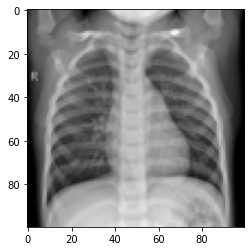

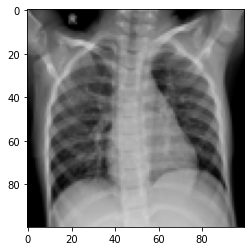

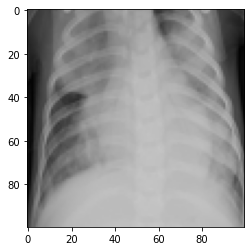

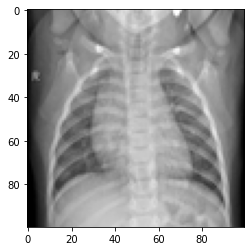

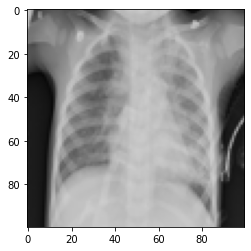

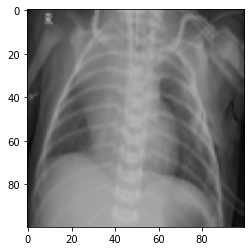

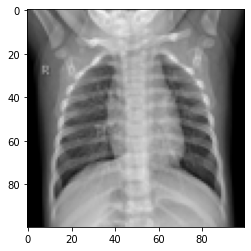

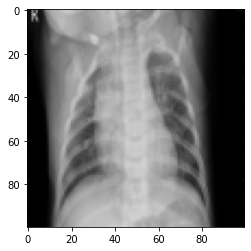

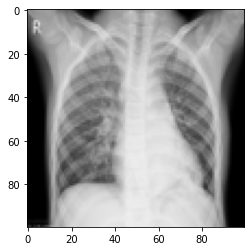

In [6]:
import pandas as pd
import numpy as np
#https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory
from pathlib import Path

directory_in_str = './Coronahack-Chest-XRay-Dataset/train/'

#array that will hold numpy arrays of images
imagesToDisplay = []
npImages = []
linNpImages = []

pathlist = Path(directory_in_str).rglob('*.jpeg')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    
    #https://auth0.com/blog/image-processing-in-python-with-pillow/
    #convert to grayscale and resize image
    image = Image.open(path_in_str).convert('LA')
    resizedImage = image.resize((100,100))
    imagesToDisplay.append(resizedImage)
    
    #convert to numpy array
    numpyImage = np.asarray(resizedImage)
    npImages.append(numpyImage)
    
    #linearize data
    linNumpyImage = numpyImage.flatten().reshape(1,20000)
    linNpImages.append(linNumpyImage)
    
for i in range(9):
    plt.imshow(imagesToDisplay[i], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.show()

## Data Reduction (6pts)

<ul>
    <li><b>[.5 points]</b> Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.</li>
    <li><b>[.5 points]</b> Perform linear dimensionality reduction of your image data using randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.</li>
    <li><b>[2 points]</b>  Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components.  Do you prefer one method over another? Why?</li>
    <li><b>[1 points]</b> Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).</li>
    <li><b>[2 points]</b> Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.</li>
</ul>

## Exceptional Work (1pt)

<ul>
    <li>One idea (<b>required for 7000 level students</b>): Perform feature extraction upon the images using DAISY. Rather than using matching go the images with the total DAISY vector, you will instead use key point matching. You will need to investigate appropriate methods for key point matching using DAISY. NOTE: this often requires some type of brute force matching per pair of images, which can be computationally expensive.</li>
</ul>